### Health insurance lead prediction

#### Problem statement

Your Client FinMan is a financial services company that provides various financial services like loan, investment funds, insurance etc. to its customers. FinMan wishes to cross-sell health insurance to the existing customers who may or may not hold insurance policies with the company. The company recommend health insurance to it's customers based on their profile once these customers land on the website. Customers might browse the recommended health insurance policy and consequently fill up a form to apply. When these customers fill-up the form, their Response towards the policy is considered positive and they are classified as a lead.

Once these leads are acquired, the sales advisors approach them to convert and thus the company can sell proposed health insurance to these leads in a more efficient manner.

Now the company needs your help in building a model to predict whether the person will be interested in their proposed Health plan/policy given the information about:

* Demographics (city, age, region etc.)\
* Information regarding holding policies of the customer\
* Recommended Policy Information

### About the data.


* Variable -  Definition
* ID	- Unique Identifier for a row
* City_Code	- Code for the City of the customers
* Region_Code	- Code for the Region of the customers
* Accomodation_Type	- Customer Owns or Rents the house
* Reco_Insurance_Type	- Joint or Individual type for the recommended insurance  
* Upper_Age	- Maximum age of the customer 
* Lower _Age	- Minimum age of the customer
* Is_Spouse	- If the customers are married to each other
(in case of joint insurance) 
* Health_Indicator - Encoded values for health of the customer
* Holding_Policy_Duration	- Duration (in years) of holding policy (a policy that customer has already subscribed to with the company)
* Holding_Policy_Type - Type of holding policy
* Reco_Policy_Cat	- Encoded value for recommended health insurance
* Reco_Policy_Premium	- Annual Premium (INR) for the recommended health insurance
* Response (Target)\
0 : Customer did not show interest in the recommended policy,\
1 : Customer showed interest in the recommended policy

For further reference of the data you can click [here](https://datahack.analyticsvidhya.com/contest/job-a-thon/#LeaderBoard), ofcourse you can also particpate the hackathon conducted by analytic vidhya.

### Steps involved in the process.

1. Data Collection.
2. Data Loading.
3. Data Preprocessing.
4. Exploratory data analysis.
5. Feature engineering.
6. Feature selection.
7. Feature transformation.
8. Model building.
9. Model evaluation.
10. Hyper parameter tuning.
11. Predictions.

In [107]:
#import the required libraries in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
import lightgbm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score

In [108]:
#Read the train data
df=pd.read_csv('train_Df64byy.csv')
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [109]:
df.tail()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1
50881,50882,C3,3866,Rented,Individual,24,24,No,X3,2.0,3.0,18,11424.0,0


In [110]:
#Get the shape of the data
print('No of records in train data: ',df.shape[0])
print('No of variables in train data: ',df.shape[1])

No of records in train data:  50882
No of variables in train data:  14


In [111]:
#test data
test_data=pd.read_csv('test_YCcRUnU.csv')
test_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [112]:
#Get the shape of the data
print('No of records in test data: ',test_data.shape[0])
print('No of variables in test data: ',test_data.shape[1])

No of records in test data:  21805
No of variables in test data:  13


In [113]:
#Get the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [114]:
#Get the statistical or description of the data
df.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [115]:
#Check any missing values or null values are present in the data
miss_data=pd.DataFrame({'Missing_values':df.isnull().sum(),'Percentage of missing':(df.isnull().sum()/df.shape[0])})
miss_data

,Missing_values,Percentage of missing
ID,0,0.000000
City_Code,0,0.000000
Region_Code,0,0.000000
Accomodation_Type,0,0.000000
Reco_Insurance_Type,0,0.000000
Upper_Age,0,0.000000
Lower_Age,0,0.000000
Is_Spouse,0,0.000000
Health Indicator,11691,0.229767
Holding_Policy_Duration,20251,0.397999


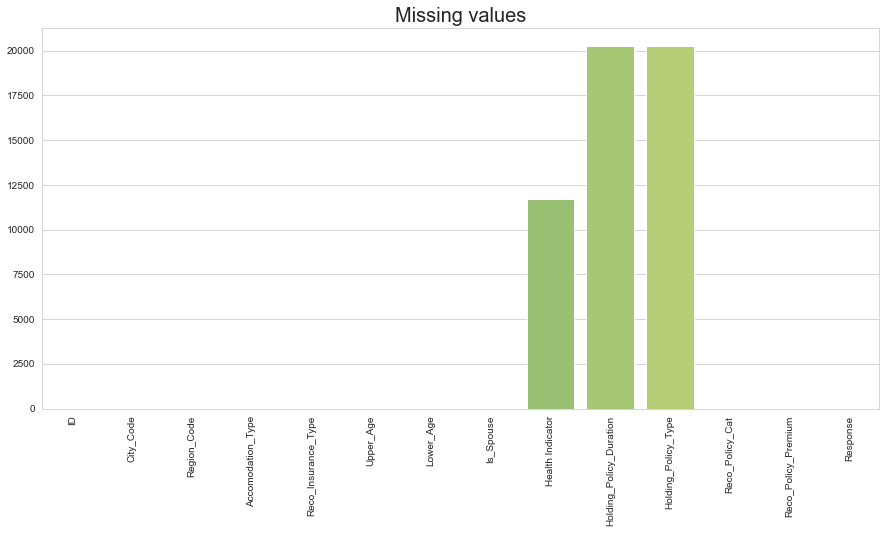

In [116]:
#plot the missing values
plt.figure(figsize=(15,7))
sns.barplot(x=miss_data.index,y=miss_data['Missing_values'].values,palette='summer')
plt.xticks(rotation=90)
plt.title('Missing values',fontsize=20)
plt.show()

### Categorcal data

In [117]:
#display the categorical data
cat_data=df.select_dtypes(include='object')
cat_data.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration
0,C3,Rented,Individual,No,X1,14+
1,C5,Owned,Joint,No,X2,NaN
2,C5,Owned,Individual,No,NaN,1.0
3,C24,Owned,Joint,No,X1,14+
4,C8,Rented,Individual,No,X2,3.0


In [118]:
#Check how many categories are in the each feature i.e.,count,unique values etc
uniq_cat=pd.DataFrame({'Unique':cat_data.nunique()})
uniq_cat

,Unique
City_Code,36
Accomodation_Type,2
Reco_Insurance_Type,2
Is_Spouse,2
Health Indicator,9
Holding_Policy_Duration,15


In [119]:
for i in cat_data.columns:
    print('*'*30)
    print('<----',i,'----->','\n')
    print(cat_data[i].value_counts())

******************************
<---- City_Code -----> 

C1     8973
C2     7747
C3     4889
C4     3671
C9     2185
C6     1950
C7     1910
C8     1806
C10    1611
C5     1364
C15    1186
C17    1159
C11    1147
C16    1135
C13    1005
C20     926
C19     899
C12     868
C18     797
C14     746
C21     679
C23     587
C24     553
C22     516
C26     499
C29     387
C25     366
C27     295
C33     286
C28     285
C32     160
C34     130
C30      58
C35      56
C36      36
C31      15
Name: City_Code, dtype: int64
******************************
<---- Accomodation_Type -----> 

Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64
******************************
<---- Reco_Insurance_Type -----> 

Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64
******************************
<---- Is_Spouse -----> 

No     42460
Yes     8422
Name: Is_Spouse, dtype: int64
******************************
<---- Health Indicator -----> 

X1    13010
X2    10332
X3 

In [120]:
#plot the categorical data
def cat_plot(var,data,pla):
    plt.figure(figsize=(13,7))
    sns.countplot(x=var,data=df,palette=pla)
    plt.title(var,fontsize=20)
    plt.xticks(rotation=90)
    plt.show()

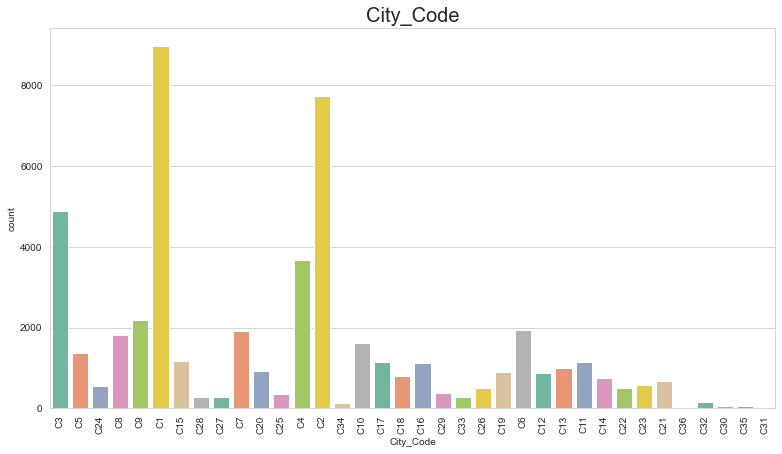

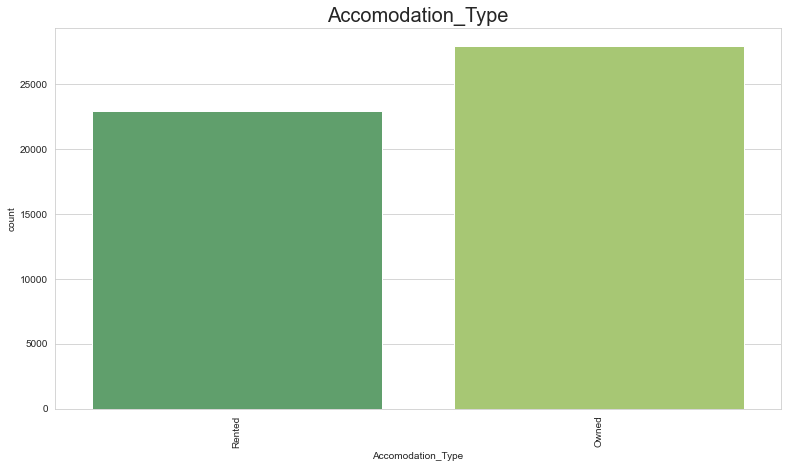

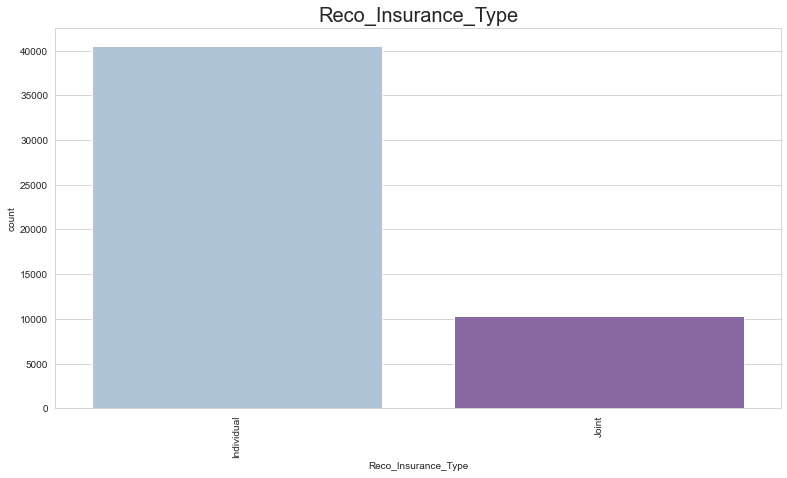

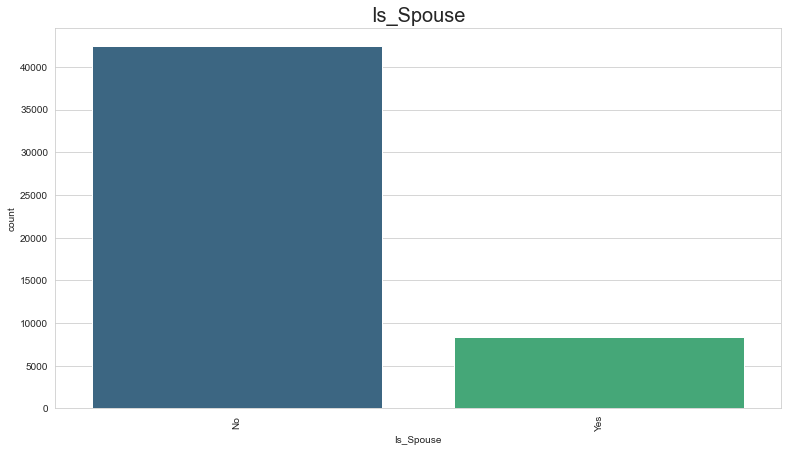

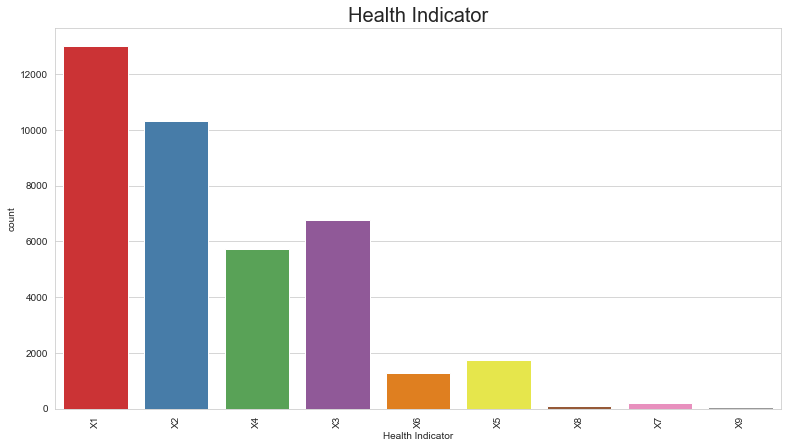

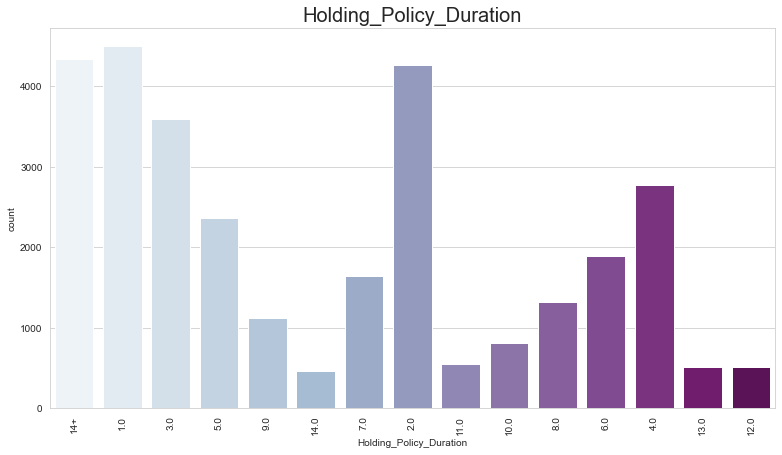

In [121]:
import random
for i in cat_data.columns:
    for p in random.choices(['summer','viridis','Set1','Set2','Set3','BuPu']):
        cat_plot(i,cat_data,p)

In [122]:
#Check the relationship between the categorical variable to the target variabel
def cat_rel_target(var,data,target='Response'):
    fg=pd.crosstab(cat_data[var],df[target])
    fg.plot.bar(figsize=(13,7))
    plt.show()

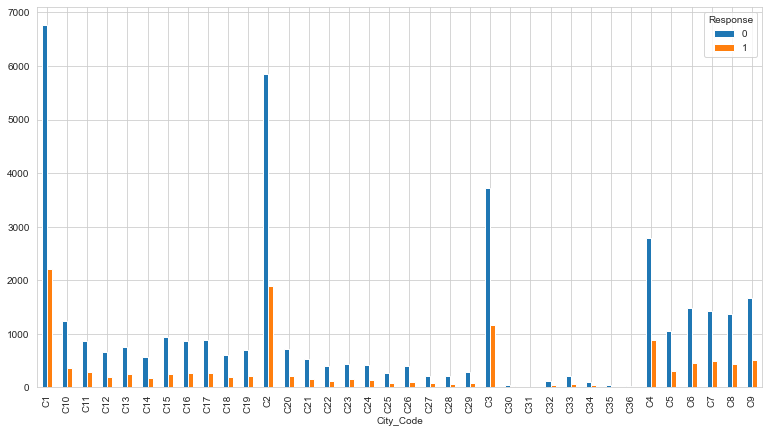

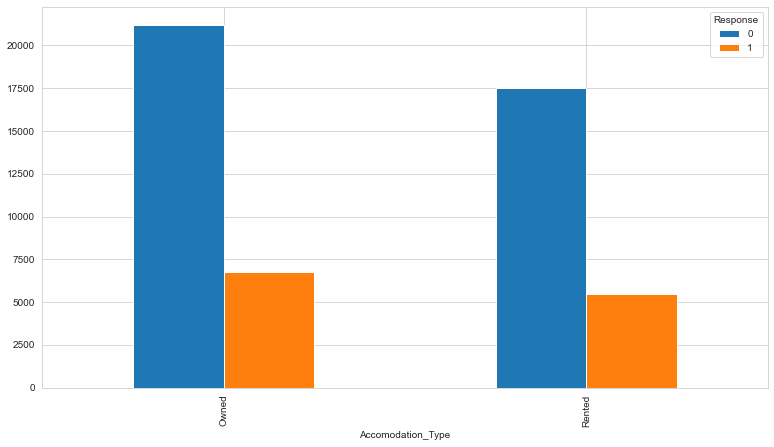

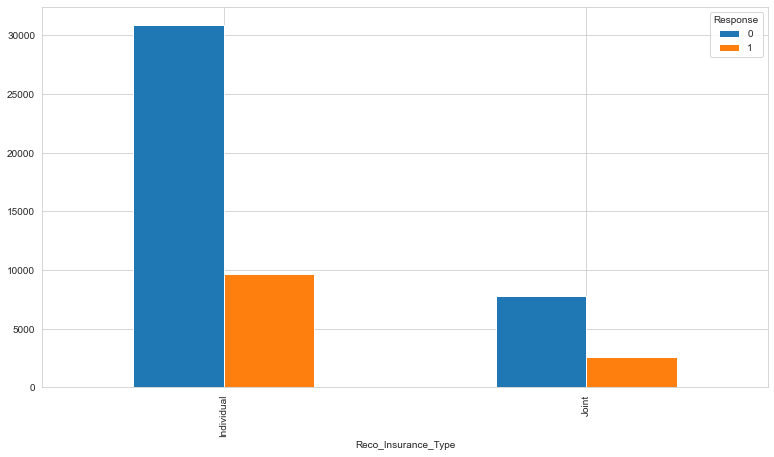

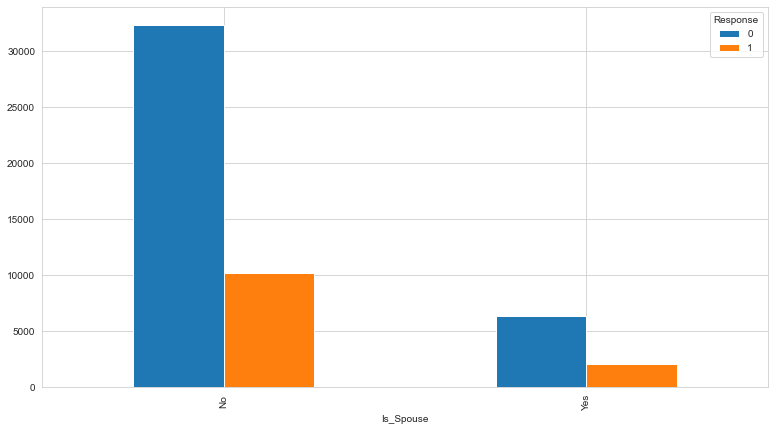

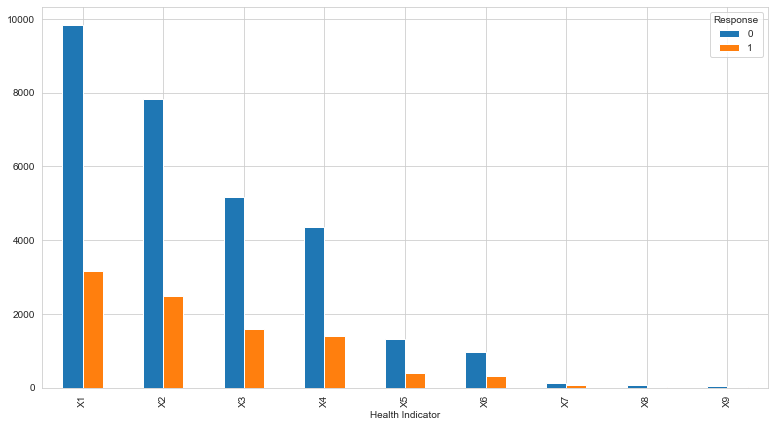

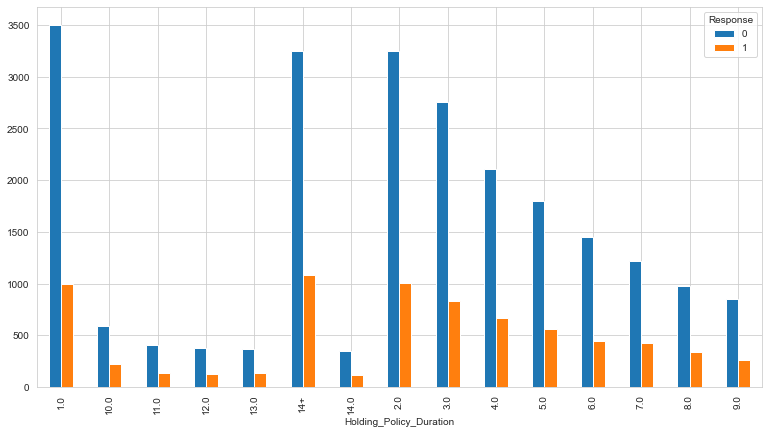

In [123]:
for v in cat_data.columns:
    cat_rel_target(v,data=cat_data)

### Numerical data

In [124]:
#display the numerical data
num_data=df.select_dtypes(include='number')
num_data.head()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,3213,36,36,3.0,22,11628.0,0
1,2,1117,75,22,NaN,22,30510.0,0
2,3,3732,32,32,1.0,19,7450.0,1
3,4,4378,52,48,3.0,19,17780.0,0
4,5,2190,44,44,1.0,16,10404.0,0


In [125]:
unqie_num=pd.DataFrame({'unique':num_data.nunique(),'dtype':num_data.dtypes})
unqie_num

,unique,dtype
ID,50882,int64
Region_Code,5316,int64
Upper_Age,58,int64
Lower_Age,60,int64
Holding_Policy_Type,4,float64
Reco_Policy_Cat,22,int64
Reco_Policy_Premium,6977,float64
Response,2,int64


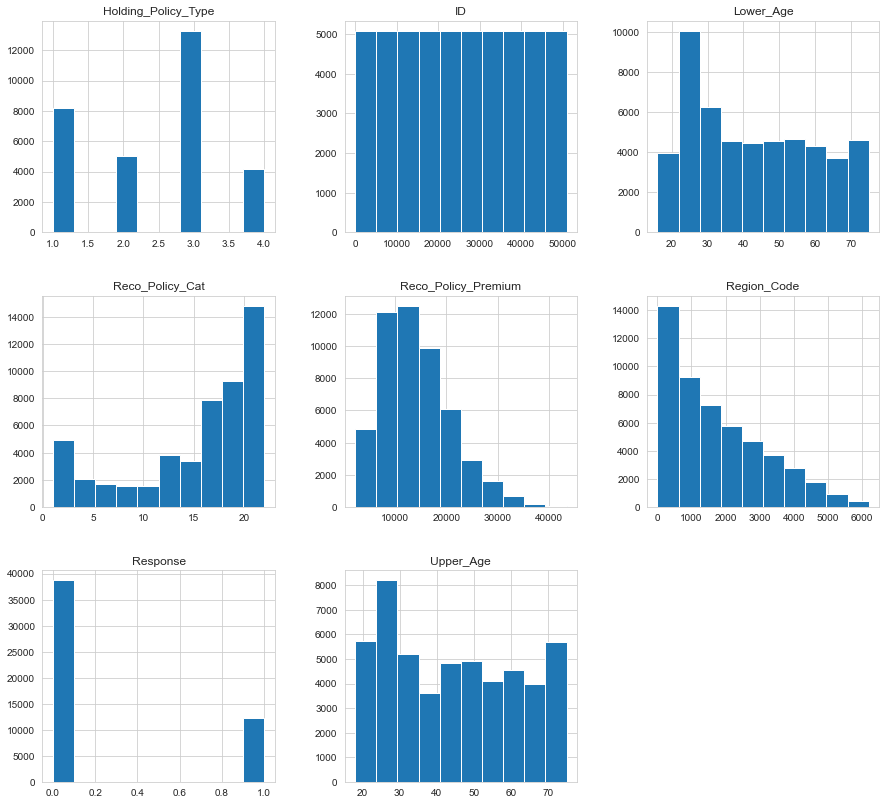

In [126]:
#visulaize the distribution of the numerical data with the help of histogram
num_data.hist(figsize=(15,14))
plt.show()

As we can noticed that the variable such as 'Reco_Policy_cat' showing left skweness while the other variable known as 'Reco_Policy_Premium' and 'Region_Code' showing Right skewness we need to handle that those variable.

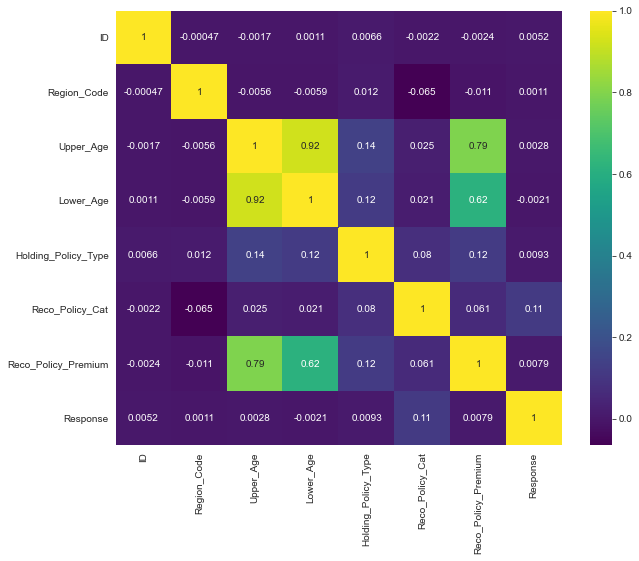

In [127]:
#Check the correlation with the help of heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

These heatmpa represents the variable

* Upper age is correlated to lower age (0.92)
* Lower age is correlated to Reco_Policy_Premium (0.62)
* Upper age is correlated to Reco_Policy_Premium (0.79)

Check the relation ship between the numerical data to the target variable known as 'Response'

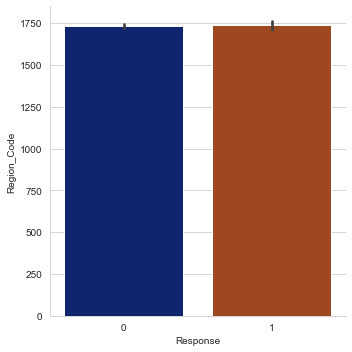

In [128]:
sns.catplot(x='Response',y='Region_Code',data=num_data,palette='dark',kind='bar')

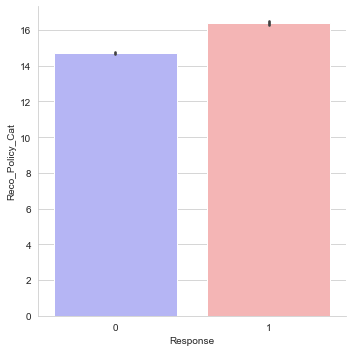

In [129]:
sns.catplot(x='Response',y='Reco_Policy_Cat',data=num_data,palette='bwr',kind='bar')

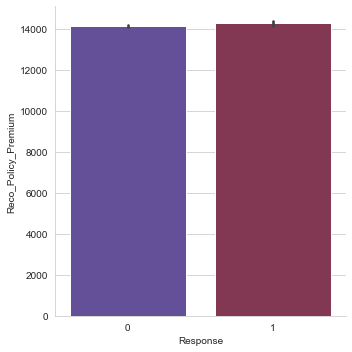

In [130]:
sns.catplot(x='Response',y='Reco_Policy_Premium',data=num_data,palette='twilight',kind='bar')

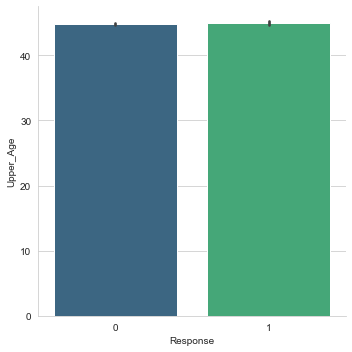

In [131]:
sns.catplot(x='Response',y='Upper_Age',data=num_data,palette='viridis',kind='bar')

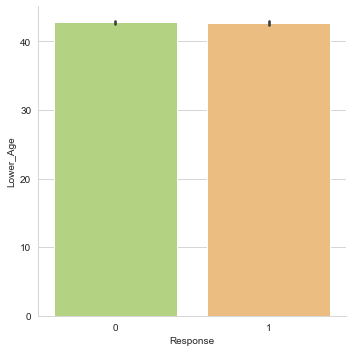

In [132]:
sns.catplot(x='Response',y='Lower_Age',data=num_data,palette='RdYlGn_r',kind='bar')

Text(0.5, 1.0, 'Outlers')

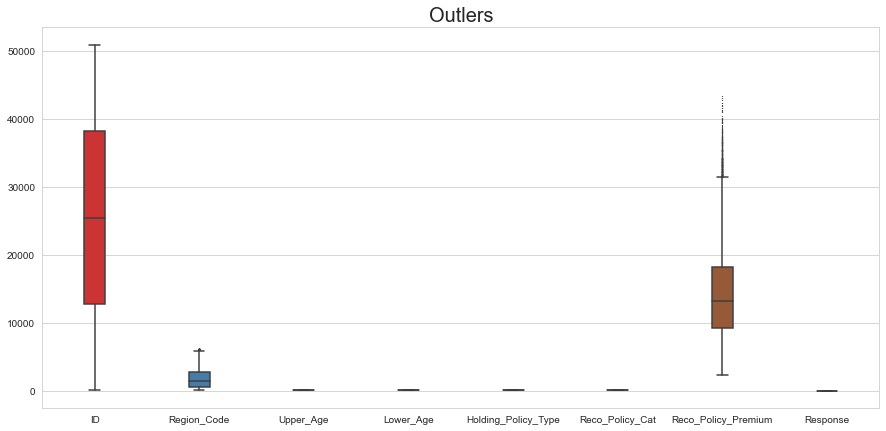

In [133]:
#Check any outlier are present in the numerical data with the help of boxplot
fig,ax=plt.subplots(figsize=(15,7))
sns.set_style('whitegrid')
sns.boxplot(data=num_data,fliersize=0.3,width=0.2,ax=ax,palette='Set1')
plt.title('Outlers',fontsize=20)

The variable 'Reco_Policy_Premium' has shown some outlier's we need to handle that otherwise it will impact on our model performance.

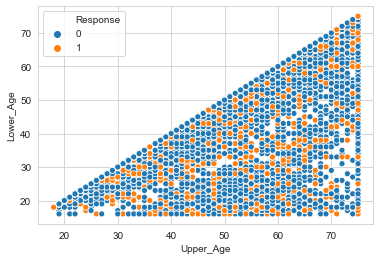

In [134]:
#Check the realtionship between the upper age and lower age
sns.scatterplot(df['Upper_Age'],df['Lower_Age'],hue='Response',data=df)

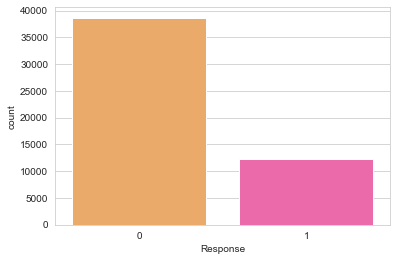

In [135]:
#Check the data is balanced or not
sns.countplot(df['Response'],palette='spring_r')

In [136]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


It look's like our data is imbalanced , so we need to do oversampling or uppersampling before fed in to the model.

#### Feature engineering.

In [149]:
df_new=df.copy()

In [150]:
#In 'Holding_Policy_Duration' column the value '14+' is not an appropraite value we need to replace the '+'.
df_new['Holding_Policy_Duration'].replace('14+','14.0',inplace=True)

In [151]:
df_new['Health Indicator']=df_new['Health Indicator'].fillna(df_new['Health Indicator'].mode()[0])

In [152]:
df_new['Holding_Policy_Duration']=df_new['Holding_Policy_Duration'].fillna(df_new['Holding_Policy_Duration'].mode()[0])

In [153]:
df_new['Holding_Policy_Type']=df_new['Holding_Policy_Type'].fillna(df_new['Holding_Policy_Type'].mode()[0])

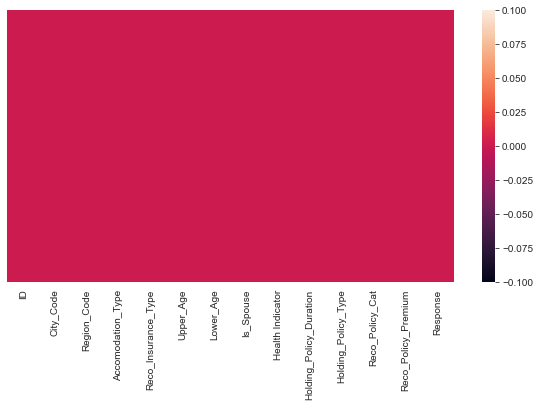

In [154]:
#After filling the nan values check agian if there is any missing values in the data
plt.figure(figsize=(10,5))
sns.heatmap(df_new.isnull(),yticklabels=False)

There is no null values in the data, then we go further process

In [155]:
#we don't require 'ID' column as it doesn't effect any our model performance hence we drop it
df_new.drop(columns=['ID'],axis=1,inplace=True)

In [156]:
#The city_code column contains 'C' alphabet as it doesn't understand our model during model building hence we remove it.
df_new['City_Code']=df['City_Code'].apply(lambda x: x.split('C')[1])

In [157]:
df_new['Health Indicator']=df_new['Health Indicator'].apply(lambda x: x.split('X')[1])

In [158]:
#Enocode the 'Accomodation_Type','Reco_Insurance_Type' and 'Is_Spouse' variables in to numerical data.
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df_new['Accomodation_Type']=lc.fit_transform(df_new['Accomodation_Type'])
df_new['Reco_Insurance_Type']=lc.fit_transform(df_new['Reco_Insurance_Type'])
df_new['Is_Spouse']=lc.fit_transform(df_new['Is_Spouse'])

In [159]:
#check the data type
df_new.dtypes

City_Code                   object
Region_Code                  int64
Accomodation_Type            int32
Reco_Insurance_Type          int32
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                    int32
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

The above information of the data type shows that the 'City_Code','Health_Indicator','Holding_Policy_Duration' are in object type we need to convert in to either int or float convertion is nessacary for the better model performance.

In [160]:
df_new['City_Code']=df_new['City_Code'].astype(int)
df_new['Health Indicator']=df_new['Health Indicator'].astype(int)
df_new['Holding_Policy_Duration']=df_new['Holding_Policy_Duration'].astype(float)

#### Feature transformation


In [161]:
df_1=df_new.copy()

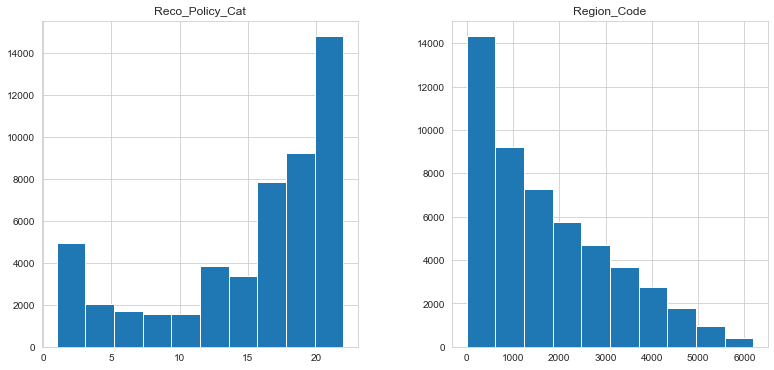

In [162]:
#The three columns have some skweness we need to transform using either boxcox transformation or logarthemic transformation
df_1[['Reco_Policy_Cat','Region_Code']].hist(figsize=(13,6))
plt.show()

In [163]:
from scipy import stats

In [164]:
df_1['Region_Code']=np.sqrt(df_1['Region_Code'])

In [165]:
df_1['Reco_Policy_Premium']=np.sqrt(df_1['Reco_Policy_Premium'])

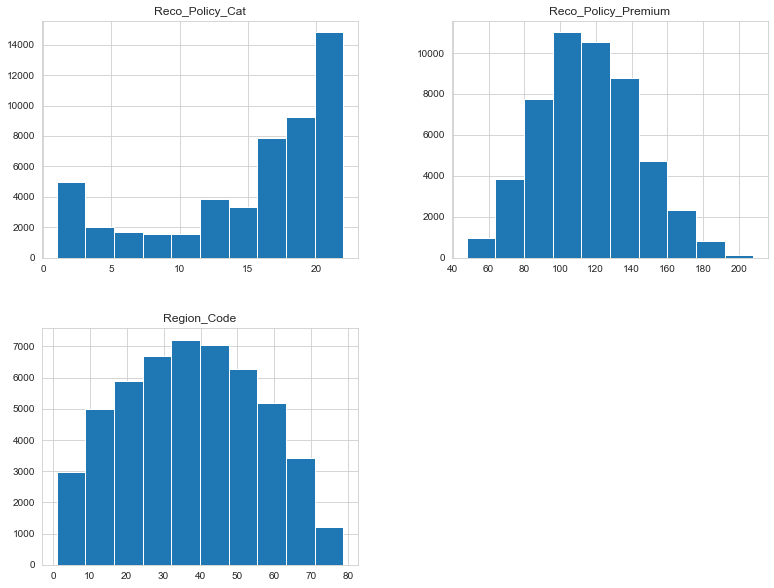

In [166]:
#After transormation
df_1[['Reco_Policy_Cat','Region_Code','Reco_Policy_Premium']].hist(figsize=(13,10))
plt.show()

In [167]:
df_1.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,3,56.683331,1,0,36,36,0,1,14.0,3.0,22,107.833205,0
1,5,33.421550,0,1,75,22,0,2,14.0,3.0,22,174.671120,0
2,5,61.090097,0,0,32,32,0,1,1.0,1.0,19,86.313383,1
3,24,66.166457,0,1,52,48,0,1,14.0,3.0,19,133.341666,0
4,8,46.797436,1,0,44,44,0,2,3.0,1.0,16,102.000000,0


#### Feature selection

In [223]:
#split the data in to x and y
x=df_1.drop('Response',1)
y=df_1['Response']

In [169]:
#Feature selection by using Chi2 test method
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
sele=SelectKBest(score_func=chi2,k='all')
sele.fit(x,y)
sele.scores_

array([1.14329636e+01, 8.08791605e-01, 7.56114570e-01, 3.96597219e+00,
       2.61216592e+00, 1.57292963e+00, 6.32295709e-01, 2.38793010e-01,
       1.50625352e+01, 5.22117245e-01, 1.76872639e+03, 2.29175098e+01])

In [170]:
bes=pd.DataFrame(data=sele.scores_,index=x.columns,columns=['Score'])
bes

,Score
City_Code,11.432964
Region_Code,0.808792
Accomodation_Type,0.756115
Reco_Insurance_Type,3.965972
Upper_Age,2.612166
Lower_Age,1.572930
Is_Spouse,0.632296
Health Indicator,0.238793
Holding_Policy_Duration,15.062535
Holding_Policy_Type,0.522117


In [171]:
#Feature selection by ExtraTreeClassifier
from sklearn.tree import ExtraTreeClassifier
exta=ExtraTreeClassifier()
exta.fit(x,y)
exta.feature_importances_

array([0.09879234, 0.16475526, 0.02050127, 0.00562735, 0.12419706,
       0.12054422, 0.00969922, 0.08609312, 0.07626988, 0.0407183 ,
       0.09544348, 0.1573585 ])

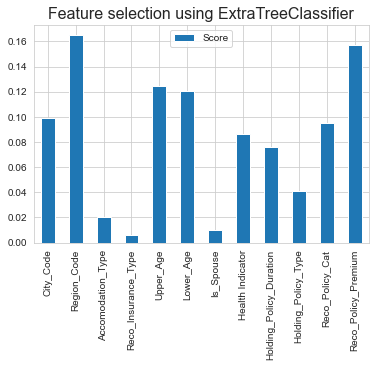

In [172]:
ex_best=pd.DataFrame(data=exta.feature_importances_,index=x.columns,columns=['Score'])
ex_best.plot.bar()
plt.title('Feature selection using ExtraTreeClassifier',fontsize=16)
plt.show()

In this case the output data is imbalanced we need to take of that with the help of some techniques known as 'SMOTETomek','Oversampling' etc.

In [224]:
#Oversampling the data with the randomoversample with the ratio of 0.75
from imblearn.over_sampling import RandomOverSampler
rs=RandomOverSampler(0.85)
x_res,y_res=rs.fit_resample(x,y)

C:\Users\Praneeth\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.85 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [225]:
from collections import Counter
print('Original data shape: ',Counter(y))
print('After reasmpling the data: ',Counter(y_res))

Original data shape:  Counter({0: 38673, 1: 12209})
After reasmpling the data:  Counter({0: 38673, 1: 32872})


In [226]:
#get the shape after sampling the data 
x_res.shape,y_res.shape

((71545, 12), (71545,))

In [227]:
# Scale the data before we pass to the train and test to prevent the data leakage 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_res=sc.fit_transform(x_res)

In [228]:
#SPlitting the data in to train and test split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=0)

#### Model building

1. Logistic Regression.
2. RandomForestClassifier.
3. DecisionTreeClassifier.
4. KneighborsClassifier.
5. Support vector classifier.
6. GradientBoostingClassifier.
7. Xgboost.
8. Lightgbm.

In [229]:
print('LogisticRegression')
#1. Logistic Regression
log=LogisticRegression()
log.fit(x_train,y_train)
print('Train_score: ',log.score(x_train,y_train))
print('Test_score: ',log.score(x_test,y_test))
log_pred=log.predict_proba(x_test)[:,1]
print('Roc_auc: ',roc_auc_score(y_test,log_pred))
print('*'*30)


print('RandomForestClassifier')
#2.RandomForestClassifier.
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
print('Train_score: ',rf.score(x_train,y_train))
print('Test_score: ',rf.score(x_test,y_test))
rf_pred=rf.predict_proba(x_test)[:,1]
print('Roc_auc: ',roc_auc_score(y_test,rf_pred))
print('*'*30)


print('KneighborsClassifier')
#3. KneighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print('Train_score: ',knn.score(x_train,y_train))
print('Test_score: ',knn.score(x_test,y_test))
knn_pred=knn.predict_proba(x_test)[:,1]
print('Roc_auc: ',roc_auc_score(y_test,knn_pred))
print('*'*30)
print('DecisionTreeClassifier')


#4. DecisionTreeClassifier.
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
print('Train_score: ',tree.score(x_train,y_train))
print('Test_score: ',tree.score(x_test,y_test))
tree_pred=tree.predict_proba(x_test)[:,1]
print('Roc_auc: ',roc_auc_score(y_test,tree_pred))
print('*'*30)
print('GradientBoostingClassifier')
#6. GradientBoostingClassifier.
gd=GradientBoostingClassifier()
gd.fit(x_train,y_train)
print('Train_score: ',gd.score(x_train,y_train))
print('Test_score: ',gd.score(x_test,y_test))
gd_pred=gd.predict_proba(x_test)[:,1]
print('Roc_auc: ',roc_auc_score(y_test,gd_pred))
print('*'*30)
print('Lightgbm')
#7. Lightgbm.
lht=lightgbm.LGBMClassifier()
lht.fit(x_train,y_train)
print('Train_score: ',lht.score(x_train,y_train))
print('Test_score: ',lht.score(x_test,y_test))
lht_pred=lht.predict_proba(x_test)[:,1]
print('Roc_auc: ',roc_auc_score(y_test,lht_pred))



LogisticRegression
Train_score:  0.5392060940666713
Test_score:  0.5362359354252568
Roc_auc:  0.567032177113656
******************************
RandomForestClassifier
Train_score:  1.0
Test_score:  0.9114543294430079
Roc_auc:  0.954771113759711
******************************
KneighborsClassifier
Train_score:  0.7780243203578168
Test_score:  0.6460968621147529
Roc_auc:  0.7081459332927214
******************************
DecisionTreeClassifier
Train_score:  1.0
Test_score:  0.8341603186805507
Roc_auc:  0.8395760748050559
******************************
GradientBoostingClassifier
Train_score:  0.6037983087567266
Test_score:  0.5942413865399399
Roc_auc:  0.6467591270116754
******************************
Lightgbm
Train_score:  0.6961527709832972
Test_score:  0.6525962680830246
Roc_auc:  0.7216621745074828


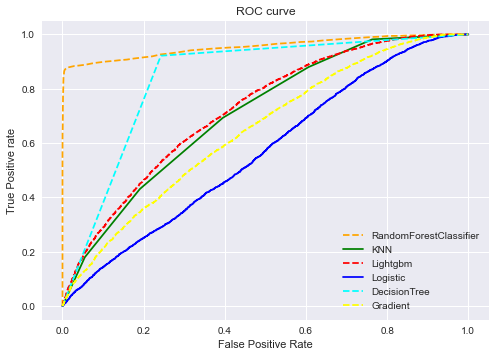

In [230]:
from sklearn.metrics import roc_curve
plt.style.use('seaborn')
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, rf_pred)
fpr2, tpr2, thresh2 = roc_curve(y_test, knn_pred)
fpr3, tpr3, thresh3 = roc_curve(y_test, lht_pred)
fpr4, tpr4, thresh4 = roc_curve(y_test, log_pred)
fpr5, tpr5, thresh5 = roc_curve(y_test, tree_pred)
fpr6, tpr6, thresh6 = roc_curve(y_test, gd_pred)
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='RandomForestClassifier')
plt.plot(fpr2, tpr2, linestyle='-',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Lightgbm')
plt.plot(fpr4, tpr4, linestyle='-',color='blue', label='Logistic')
plt.plot(fpr5, tpr5, linestyle='--',color='cyan', label='DecisionTree')
plt.plot(fpr6, tpr6, linestyle='--',color='yellow', label='Gradient')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

Above in which all the algorithem's,RandomForestclassifier perfrom well on train data but we can see that it slightly overfitting on the test data we need to handle that using Hyperparameter tuning techniques or using croos validation.

In [231]:
#Kfold croos validation to prevent the overfitting
from sklearn.model_selection import KFold
cv=KFold(n_splits=10)
score=cross_val_score(rf,x_res,y_res,scoring='accuracy',cv=cv)

KeyboardInterrupt: 

In [ ]:
score.mean()

### Test data

In [232]:
#read the test data and then make predictions
test_data=pd.read_csv('test_YCcRUnU.csv')

In [233]:
#Load the test data
test_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


After transformations,modifications,feature engineering on the train data also we need to apply the same transformations on the test data to predict the output.

In [234]:
#In 'Holding_Policy_Duration' column the value '14+' is not an appropraite value we need to replace the '+'.
test_data['Holding_Policy_Duration'].replace('14+','14.0',inplace=True)
#fill the missing values with mode
test_data['Health Indicator']=test_data['Health Indicator'].fillna(test_data['Health Indicator'].mode()[0])
test_data['Holding_Policy_Duration']=test_data['Holding_Policy_Duration'].fillna(test_data['Holding_Policy_Duration'].mode()[0])
test_data['Holding_Policy_Type']=test_data['Holding_Policy_Type'].fillna(test_data['Holding_Policy_Type'].mode()[0])

#The city_code column contains 'C' alphabet as it doesn't understand our model during model building hence we remove it.
test_data['Health Indicator']=test_data['Health Indicator'].apply(lambda x: x.split('X')[1])
#Enocode the 'Accomodation_Type','Reco_Insurance_Type' and 'Is_Spouse' variables in to numerical data.
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
test_data['Accomodation_Type']=lc.fit_transform(test_data['Accomodation_Type'])
test_data['Reco_Insurance_Type']=lc.fit_transform(test_data['Reco_Insurance_Type'])
test_data['Is_Spouse']=lc.fit_transform(test_data['Is_Spouse'])
test_data['Health Indicator']=test_data['Health Indicator'].astype(int)
test_data['Holding_Policy_Duration']=test_data['Holding_Policy_Duration'].astype(float)
t2=test_data.copy()

t2['Region_Code']=np.sqrt(t2['Region_Code'])
t2['Reco_Policy_Premium']=np.sqrt(df['Reco_Policy_Premium'])
t2['Reco_Policy_Cat'],param=stats.boxcox(t2['Reco_Policy_Cat'])

In [235]:
t2['City_Code']=t2['City_Code'].apply(lambda x: x.split('C')[1])
#Drop the i'd variable as it doesn't required to train the model
t2=t2.drop(labels=['ID'],axis=1)
#scale the data 
t2=sc.transform(t2)
fg=pd.DataFrame(t2,columns=x.columns)

In [236]:
#prediction the Response on the test data using trained model 
fg['Response']=rf.predict_proba(fg)[:,1]

In [237]:
#Read and load the submission file 
sub=pd.read_csv('sample_submission_QrCyCoT.csv')
sub.head()

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0


In [238]:
#Concatinate the predictions of t2 with the submission file 
sub['Response']=fg['Response']
sub.head()

,ID,Response
0,50883,0.36
1,50884,0.43
2,50885,0.43
3,50886,0.37
4,50887,0.35


In [240]:
#Save the submission file 
sub.to_csv('My_subd.csv',index=False)

### Conclusion
As we done data loading,data preprocessing,exploratory data analysis,feature engneering,feature selection,feature transformation,over sampling,model building,model evaluation and predictions on the given data.also we applied so many techniques to get better performance on the test data.The algorithems such as **RandomForestClassifier** performs well both on train data and test data also it give proper **roc_auc** score as compared to the other machine learning model in this usecase.